In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# melt
1. 1개의 열만 고정하고 나머지 열을 행으로 바꾸기
* 퓨 리서치 센터에서 조사한 미국의 소득과 종교 데이터
* 데이터프레임의 열은 열 자체가 어떠 값 의미
* 데이터 프레임의 열이 옆으로 길게 늘어선 형태

## melt 메서드 인자
* id_vars: 위치를 그대로 유지할 열의 이름을 지정
* value_var:형으호 위치를 변경할 열의 이름을 지정
* var_name: value_var로 위치를 변경할 열의 이름을 지정
* value_name으로 위치를 변경할 열의 데이터를 저장할 열의 이름을 지정

In [3]:
pew = pd.read_csv('../data/pew.csv')
print(pew.head())

             religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  $50-75k  \
0            Agnostic     27       34       60       81       76      137   
1             Atheist     12       27       37       52       35       70   
2            Buddhist     27       21       30       34       33       58   
3            Catholic    418      617      732      670      638     1116   
4  Don’t know/refused     15       14       15       11       10       35   

   $75-100k  $100-150k  >150k  Don't know/refused  
0       122        109     84                  96  
1        73         59     74                  76  
2        62         39     53                  54  
3       949        792    633                1489  
4        21         17     18                 116  


In [4]:
print(pew.iloc[:, 0:6])

                   religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k
0                  Agnostic     27       34       60       81       76
1                   Atheist     12       27       37       52       35
2                  Buddhist     27       21       30       34       33
3                  Catholic    418      617      732      670      638
4        Don’t know/refused     15       14       15       11       10
5          Evangelical Prot    575      869     1064      982      881
6                     Hindu      1        9        7        9       11
7   Historically Black Prot    228      244      236      238      197
8         Jehovah's Witness     20       27       24       24       21
9                    Jewish     19       19       25       25       30
10            Mainline Prot    289      495      619      655      651
11                   Mormon     29       40       48       51       56
12                   Muslim      6        7        9       10        9
13    

In [18]:
pew.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [25]:
# id_vars: 위치를 그대로 유지할 열의 이름을 지정

pew_long = pd.melt(pew, id_vars='religion') 
print(pew_long.head())

             religion variable  value
0            Agnostic    <$10k     27
1             Atheist    <$10k     12
2            Buddhist    <$10k     27
3            Catholic    <$10k    418
4  Don’t know/refused    <$10k     15


In [29]:
# var_name: value_var로 위치를 변경할 열의 이름을 지정

pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
print(pew_long.head())

             religion income  count
0            Agnostic  <$10k     27
1             Atheist  <$10k     12
2            Buddhist  <$10k     27
3            Catholic  <$10k    418
4  Don’t know/refused  <$10k     15


# 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

In [30]:
billboard = pd.read_csv('../data/billboard.csv')
print(billboard.iloc[0:5, 0:16])

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5   wk6   wk7   wk8   wk9  wk10  wk11  
0  72.0  77.0  87.0  94.0  99.0   NaN   NaN   NaN   NaN  
1  92.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  68.0  67.0  66.0  57.0  54.0  53.0  51.0  51.0  51.0  
3  72.0  69.0  67.0  65.0  55.0  59.0  62.0  61.0  61.0  
4  25.0  17.0  17.0  31.0  36.0  49.0  53.0  57.0  64.0  


In [31]:
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'date.entered'], var_name='week', value_name='rating')
print(billboard_long.head())

   year        artist                    track date.entered  week rating
0  2000         2 Pac  Baby Don't Cry (Keep...   2000-02-26  time   4:22
1  2000       2Ge+her  The Hardest Part Of ...   2000-09-02  time   3:15
2  2000  3 Doors Down               Kryptonite   2000-04-08  time   3:53
3  2000  3 Doors Down                    Loser   2000-10-21  time   4:24
4  2000      504 Boyz            Wobble Wobble   2000-04-15  time   3:35


In [40]:
# Cases_Guinea: 발명국가, Deaths_Guinea: 사망자수, 나라이름

ebola = pd.read_csv('../data/country_timeseries.csv')
print(ebola.columns)

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [41]:
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [43]:
# id_vars: 위치를 그대로 유지할 열의 이름을 지정

ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
print(ebola_long.head())
print(ebola_long.tail())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0
           Date  Day     variable  value
1947  3/27/2014    5  Deaths_Mali    NaN
1948  3/26/2014    4  Deaths_Mali    NaN
1949  3/25/2014    3  Deaths_Mali    NaN
1950  3/24/2014    2  Deaths_Mali    NaN
1951  3/22/2014    0  Deaths_Mali    NaN


In [44]:
variable_split = ebola_long.variable.str.split('_')
print(variable_split[:5])

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [46]:
print(type(variable_split))
print(type(variable_split[0]))

<class 'pandas.core.series.Series'>
<class 'list'>


In [49]:
status_values = variable_split.str.get(0)
country_values = variable_split.str.get(1)

print(status_values[-5:])
print(country_values[:5])
print(country_values[-5:])

1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, dtype: object
0    Guinea
1    Guinea
2    Guinea
3    Guinea
4    Guinea
Name: variable, dtype: object
1947    Mali
1948    Mali
1949    Mali
1950    Mali
1951    Mali
Name: variable, dtype: object


In [50]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values
print(ebola_long.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


In [51]:
variavle_split = ebola_long.variable.str.split('_', expand=True)
variable_split.columns = ['status', 'country']
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)

print(ebola_parsed.head())

         Date  Day      variable   value status country         variable
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea  [Cases, Guinea]
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea  [Cases, Guinea]
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea  [Cases, Guinea]
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea  [Cases, Guinea]
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea  [Cases, Guinea]


In [53]:
weather = pd.read_csv('../data/weather.csv')
print(weather.iloc[:5, :11])

        id  year  month element  d1    d2    d3  d4    d5  d6  d7
0  MX17004  2010      1    tmax NaN   NaN   NaN NaN   NaN NaN NaN
1  MX17004  2010      1    tmin NaN   NaN   NaN NaN   NaN NaN NaN
2  MX17004  2010      2    tmax NaN  27.3  24.1 NaN   NaN NaN NaN
3  MX17004  2010      2    tmin NaN  14.4  14.4 NaN   NaN NaN NaN
4  MX17004  2010      3    tmax NaN   NaN   NaN NaN  32.1 NaN NaN


In [54]:
weather_melt = pd.melt(weather,
                      id_vars=['id', 'year', 'month', 'element'],
                      var_name='day',
                      value_name='temp')
print(weather_melt.head())

        id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN


In [58]:
# index 인자: 위치를 그대로 유지할 열 이름을 지정
# columns: 피벗할 열 이름을 지정

weather_tidy = weather_melt.pivot_table(
    index= ['id', 'year', 'month', 'day'],
    columns='element',
    values='temp'
)

print(weather_tidy)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d

In [59]:
# reset_index: 기존의 행 인덱스를 제거, 새로 지정

weather_tidy_flat = weather_tidy.reset_index()
print(weather_tidy_flat.head())

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4


In [65]:
practice = pd.read_csv('../data/practice.csv', index_col=0, encoding='utf-8')

In [66]:
practice.loc[6] = ['19-3-4', '걷기', 1.5]
practice.loc[7] = ['19-3-5', '달리기', 1]
practice.loc[8] = ['19-3-6', '걷기', 2.5]
practice.loc[9] = ['19-3-6', '달리기', 0.5]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [68]:
# 평균값
# pivot_table을 사용하면 세로로 있던 데이터가 평균값으로 변경
# pivot_table은 기본적으로 평균을 구함
practice.pivot_table(index='운동')

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [71]:
# aggfunc=np.sum 을 하면 전체의 합을 구함

practice.pivot_table(index='운동', aggfunc=np.sum)

,양
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [72]:
print(6.5/4) # 걷기

1.625


In [74]:
# lend 은 전체의 양

practice.pivot_table(index='운동', aggfunc=[np.sum, len])

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [75]:
practice.pivot('날짜', '운동', '양') # 칼럼 쉽게 지정

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0
19-3-4,1.5,NaN,NaN
19-3-5,NaN,NaN,1.0
19-3-6,2.5,NaN,0.5


In [76]:
prac_pivot = practice.pivot('날짜', '운동', '양')
prac_pivot.fillna(0, inplace=True)
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,0.0,1.0
19-3-4,1.5,0.0,0.0
19-3-5,0.0,0.0,1.0
19-3-6,2.5,0.0,0.5


In [101]:
billboard = pd.read_csv('../data/billboard.csv')
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], 
                         var_name='week', value_name='rating')

print(billboard_long.shape)
print(billboard_long.head())

(24092, 7)
   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


In [107]:
print(billboard_long[billboard_long.track == 'Loser'].head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [108]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [109]:
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']] 
print(billboard_songs.shape)

(24092, 4)


In [110]:
billboard_songs = billboard_songs.drop_duplicates()
print(billboard_songs.shape)

(317, 4)


In [111]:
billboard_songs['id'] = range(len(billboard_songs))
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


In [117]:
billboard_ratings = billboard_long.merge(billboard_songs, on=['year', 'artist', 'track', 'time'])
print(billboard_ratings.shape)

(24092, 8)


In [116]:
print(billboard_ratings.head())

   year artist                    track  time date.entered week  rating  id
0  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0   0
1  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk2    82.0   0
2  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk3    72.0   0
3  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk4    77.0   0
4  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk5    87.0   0


In [ ]:
df = pd.read_csv('../data/dust/')

In [120]:
import glob
dust = glob.glob('../data/dust/*.csv')
print(len(dust))

12


In [266]:
dust_list = []
for dust_csv in dust:
    dust_df = pd.read_csv(dust_csv, index_col=0, encoding='cp949')
    dust_list.append(dust_df)
    
dust_concat_df = pd.concat(dust_list)
print('list_num: ', len(dust_list))
print(dust_concat_df.head())

list_num:  12
     ...1   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X22  X23  X24  \
1  서울시 평균  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
2     종로구  1.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
3      중구  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
4     용산구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   
5     성동구  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...  2.0  1.0  1.0   

   X25  X26  X27  X28  X29  X30  X31  
1  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
2  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
3  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
4  1.0  1.0  2.0  1.0  2.0  2.0  2.0  
5  1.0  1.0  2.0  1.0  2.0  2.0  2.0  

[5 rows x 32 columns]


In [280]:
dust_concat_df.head()

,...1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
5,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [281]:
len(dust_concat_df)

312

In [270]:
dust_concat_df.head(2)

,...1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0


In [273]:
dust_melt_df = pd.melt(dust_concat_df, id_vars=['...1'])
dust_melt_df

,...1,variable,value
0,서울시 평균,X1,2.0
1,종로구,X1,1.0
2,중구,X1,1.0
3,용산구,X1,2.0
4,성동구,X1,2.0
...,...,...,...
9667,관악구,X31,NaN
9668,서초구,X31,NaN
9669,강남구,X31,NaN
9670,송파구,X31,NaN


In [283]:
dust_df = pd.crosstab(dust_melt_df['...1'], dust_melt_df['value'])
dust_df.head()

value,0.0,1.0,2.0,3.0
...1,,,,
강남구,64,141,138,22
강동구,30,119,176,40
강북구,62,149,132,22
강서구,53,123,162,26
관악구,27,127,173,38


In [286]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path ="C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

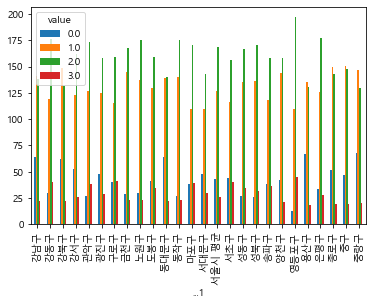

In [287]:
dust_df.plot(kind='bar')

In [288]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [289]:
# sex 열의 자료형은 카테고리
# 문자열 반복해서 sex_str 열에 저장

tips['sex_str'] = tips['sex'].astype(str)
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [290]:
tips['total_bill'] = tips['total_bill'].astype(str)
print(tips.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [292]:
tips['total_bill'] = tips['total_bill'].astype(float)
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [293]:
tips_sub_miss = tips.head(10)
tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'

print(tips_sub_miss)

  total_bill   tip     sex smoker  day    time  size sex_str
0      16.99  1.01  Female     No  Sun  Dinner     2  Female
1    missing  1.66    Male     No  Sun  Dinner     3    Male
2      21.01  3.50    Male     No  Sun  Dinner     3    Male
3    missing  3.31    Male     No  Sun  Dinner     2    Male
4      24.59  3.61  Female     No  Sun  Dinner     4  Female
5    missing  4.71    Male     No  Sun  Dinner     4    Male
6       8.77  2.00    Male     No  Sun  Dinner     2    Male
7    missing  3.12    Male     No  Sun  Dinner     4    Male
8      15.04  1.96    Male     No  Sun  Dinner     2    Male
9      14.78  3.23    Male     No  Sun  Dinner     2    Male


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [294]:
print(tips_sub_miss.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [295]:
tips_sub_miss['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [296]:
pd.to_numeric(tips_sub_miss['total_bill'])

ValueError: Unable to parse string "missing" at position 1

In [297]:
# errors를 ignore로 설정하면 오류는 발생하지 안지만, 자료형도 변하지 않음

tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')

print(tips_sub_miss.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
# errors='ignore' 하면 문자열 NaN값으로 변경

tips_sub_miss

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,NaN,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,NaN,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,NaN,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,NaN,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [309]:
import warnings
warnings.simplefilter(action = 'ignore')

In [310]:
# coerce: 숫자로 변환할 수 없는 값을 누락값으로 지정

tips_sub_miss['total_bill'] = \
pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')

print(tips_sub_miss.dtypes)

total_bill     float32
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [312]:
# downcast는 자료형을 더 작은 형태로 만들 때 사용
# float64는 float32보다 더 많은 실수를 표현할 수 있지만,
# 메모리 공간을 2배나 차지 저장하려는 실수의 예상 범위가 크지 않다면 
# 다운케스트 하는 것도 좋음

tips_sub_miss['total_bill'] = \
pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce', downcast='float')
print(tips_sub_miss.dtypes)

total_bill     float32
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


# 문자열을 카테고리 자료형으로 변환
* 문자열 자료형 보다 카테고리 자료형을 사용하는 것이 용량과 속도 면에서 더 효율적 

In [313]:
tips['sex'] = tips['sex'].astype('str')
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 10.7+ KB
None


In [315]:
tips['sex'] = tips['sex'].astype('category')
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_str       244 non-null object
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.2+ KB
None


# apply
* 직접 만든 함수를 적용
* 브로드캐스팅

In [316]:
def my_sq(x):
    return x ** 2

In [317]:
def my_exp(x, n):
    return x ** n

In [318]:
print(my_sq(4))

16


In [319]:
print(my_exp(3, 4))

81


In [320]:
import pandas as pd

df = pd.DataFrame({'a': [10, 20, 30], 'b': [20, 30, 40]})

print(df)

    a   b
0  10  20
1  20  30
2  30  40


In [321]:
print(df['a'] ** 2)

0    100
1    400
2    900
Name: a, dtype: int64


In [327]:
sq = df['a'].apply(my_sq)
print(sq)

0    100
1    400
2    900
Name: a, dtype: int64


In [328]:
print(df.apply(my_sq, axis=1))

     a     b
0  100   400
1  400   900
2  900  1600


In [325]:
ex = df['a'].apply(my_exp, n=2)
print(ex)

0    100
1    400
2    900
Name: a, dtype: int64


# 데이터프레임의 누락값을 처리한 다음 apply메서드 사용하기
1. 데이터 프레임의 누락값 처리하기 - 열방향

In [329]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [330]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [337]:
import numpy as np

# null값 계산
def count_missing(vec):
    null_vec = pd.isnull(vec)
    #print(vec)
    null_count = np.sum(null_vec)
    return null_count

In [338]:
cmis_col = titanic.apply (count_missing)
print(cmis_col)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [340]:
# prop_missing 누락값의 비율 계산
# count_missing 함수를 이용하여 누락값의 개수를 구하고
# size 속성을 이용하여 df 전체 데이터 수를 구하여 나눔

def prop_missing(vec):
    num = count_missing(vec)
    dem = vec.size
    # print('누락값 개수 구하고 데이터수 나눔', % (num, dem))
    return num / num

In [342]:
pmis_col = titanic.apply(prop_missing)
print(pmis_col)

survived       NaN
pclass         NaN
sex            NaN
age            1.0
sibsp          NaN
parch          NaN
fare           NaN
embarked       1.0
class          NaN
who            NaN
adult_male     NaN
deck           1.0
embark_town    1.0
alive          NaN
alone          NaN
dtype: float64


In [343]:
# 누락값이 아닌 데이터 비율을 구함
# 전체(1) - 누락값의 비율

def prop_complete(vec):
    return 1 - prop_missing(vec)

In [347]:
cmis_row = titanic.apply(count_missing, axis=1)
pmis_row = titanic.apply(prop_missing, axis=1)
pcom_row = titanic.apply(prop_complete, axis=1)

print(cmis_row.head())
print(titanic.head())

0    1
1    0
2    1
3    0
4    1
dtype: int64
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [345]:
print(pmis_row.head())

0    1.0
1    NaN
2    1.0
3    NaN
4    1.0
dtype: float64


In [346]:
print(pcom_row.head())

0    0.0
1    NaN
2    0.0
3    NaN
4    0.0
dtype: float64


In [348]:
titanic['num_missing'] = titanic.apply(count_missing, axis=1)

print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  num_missing  
0    man        True  NaN  Southampton    no  False            1  
1  woman       False    C    Cherbourg   yes  False            0  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            0  
4    man        True  NaN  Southampton    no   True            1  


In [349]:
# 누락값이 있는 데이터만 따로 모아옴
# 누락값이 2개 이상인 데이터만 10개 추출


print(titanic.loc[titanic.num_missing > 1, :].sample(10))

     survived  pclass     sex  age  sibsp  parch     fare embarked  class  \
48          0       3    male  NaN      2      0  21.6792        C  Third   
593         0       3  female  NaN      0      2   7.7500        Q  Third   
168         0       1    male  NaN      0      0  25.9250        S  First   
485         0       3  female  NaN      3      1  25.4667        S  Third   
274         1       3  female  NaN      0      0   7.7500        Q  Third   
648         0       3    male  NaN      0      0   7.5500        S  Third   
760         0       3    male  NaN      0      0  14.5000        S  Third   
354         0       3    male  NaN      0      0   7.2250        C  Third   
176         0       3    male  NaN      3      1  25.4667        S  Third   
611         0       3    male  NaN      0      0   7.0500        S  Third   

       who  adult_male deck  embark_town alive  alone  num_missing  
48     man        True  NaN    Cherbourg    no  False            2  
593  woman    

# practice

In [4]:
import pandas as pd

sesac= [{'name': 'A', 'birth': '1999-06-27', 'mid': 95, 'fin': 85},
             {'name': 'B', 'birth': '1997-06-27', 'mid': 85, 'fin': 80},
             {'name': 'C', 'birth': '1998-06-27', 'mid': 10, 'fin': 30},
             {'name': 'D', 'birth': '2000-06-27', 'mid': 73, 'fin': 90}]

In [5]:
df = pd.DataFrame(sesac, columns = ['name', 'birth', 'mid', 'fin'])
df

,name,birth,mid,fin
0,A,1999-06-27,95,85
1,B,1997-06-27,85,80
2,C,1998-06-27,10,30
3,D,2000-06-27,73,90


In [6]:
df[['mid', 'fin']]

,mid,fin
0,95,85
1,85,80
2,10,30
3,73,90


In [7]:
import pandas as pd

In [8]:
# 1번

df['tot'] = df['mid'] + df['fin']
df

,name,birth,mid,fin,tot
0,A,1999-06-27,95,85,180
1,B,1997-06-27,85,80,165
2,C,1998-06-27,10,30,40
3,D,2000-06-27,73,90,163


In [39]:
# 2
def avg(sum):
    return (sum)/2.
df['avg'] = df['tot'].apply(avg)
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,90.0,합격,1999,24
1,B,1997-06-27,85,80,165,82.5,합격,1997,26
2,C,1998-06-27,10,30,40,20.0,불합격,1998,25
3,D,2000-06-27,73,90,163,81.5,합격,2000,23


In [37]:
# 2번

df['avg'] = (df['mid'] + df['fin']) / 2
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,90.0,합격,1999,24
1,B,1997-06-27,85,80,165,82.5,합격,1997,26
2,C,1998-06-27,10,30,40,20.0,불합격,1998,25
3,D,2000-06-27,73,90,163,81.5,합격,2000,23


In [43]:
# 3
def grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'F'
df['grade'] = df['avg'].apply(grade)
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,90.0,A,1999,24
1,B,1997-06-27,85,80,165,82.5,B,1997,26
2,C,1998-06-27,10,30,40,20.0,F,1998,25
3,D,2000-06-27,73,90,163,81.5,B,2000,23


In [42]:
def grade(avg):
    if avg >= 90: return 'A'
    elif avg >= 80: return 'B'
    elif avg >= 70: return 'C'
    else: return 'F'
df['grade'] = df['avg'].apply(grade)
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,90.0,A,1999,24
1,B,1997-06-27,85,80,165,82.5,B,1997,26
2,C,1998-06-27,10,30,40,20.0,F,1998,25
3,D,2000-06-27,73,90,163,81.5,B,2000,23


In [10]:
# 3번

df1 = []

for x in df['avg']:
    if x >= 90:
        df1.append('A')
    elif x >= 80:
        df1.append('B')
    elif x >= 70:
        df1.append('C')
    else:
        df1.append('F')
        
print(df1)

df['grade'] = df1
df

['A', 'A', 'F', 'A']


,name,birth,mid,fin,tot,avg,grade
0,A,1999-06-27,95,85,180,180,A
1,B,1997-06-27,85,80,165,165,A
2,C,1998-06-27,10,30,40,40,F
3,D,2000-06-27,73,90,163,163,A


In [11]:
# 4

def acceptance(x):
    if x in ['A', 'B', 'C']:
        return '합격'
    else:
        return '불합격'
        

a_df = df['grade'].apply(acceptance)
df['grade'] = a_df
df

,name,birth,mid,fin,tot,avg,grade
0,A,1999-06-27,95,85,180,180,합격
1,B,1997-06-27,85,80,165,165,합격
2,C,1998-06-27,10,30,40,40,불합격
3,D,2000-06-27,73,90,163,163,합격


In [12]:
# 5
def year(x):
    return x[:4]

    
b_df = df['birth'].apply(year)
df['year'] = b_df
df

,name,birth,mid,fin,tot,avg,grade,year
0,A,1999-06-27,95,85,180,180,합격,1999
1,B,1997-06-27,85,80,165,165,합격,1997
2,C,1998-06-27,10,30,40,40,불합격,1998
3,D,2000-06-27,73,90,163,163,합격,2000


In [44]:
# 5
df['year'] = df['birth'].apply(lambda x : x.split('-')[0])
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,90.0,A,1999,24
1,B,1997-06-27,85,80,165,82.5,B,1997,26
2,C,1998-06-27,10,30,40,20.0,F,1998,25
3,D,2000-06-27,73,90,163,81.5,B,2000,23


In [45]:
# 5
def birth_year(date):
    birth_list = date.split('-')
    return birth_list[0]

df['year'] = df['birth'].apply(birth_year)
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,90.0,A,1999,24
1,B,1997-06-27,85,80,165,82.5,B,1997,26
2,C,1998-06-27,10,30,40,20.0,F,1998,25
3,D,2000-06-27,73,90,163,81.5,B,2000,23


In [ ]:
# 5
df['year'] = df['birth'].apply(lambda x : x[:4])

In [ ]:
# 5
df['year']= pd.to_datetime(df['birth'], format='%Y-%m-%d').dt.year

In [ ]:
# 5
def birth_year(v):
    return int(v.split('-')[0])
df['year'] = df['birth'].apply(birth_year)
df

In [ ]:
# 5
def g_year(vec):
    l=vec.split('-')
    return l[0]

df['year']=df['birth'].apply(g_year)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
name     4 non-null object
birth    4 non-null object
mid      4 non-null int64
fin      4 non-null int64
tot      4 non-null int64
avg      4 non-null int64
grade    4 non-null object
year     4 non-null object
dtypes: int64(4), object(4)
memory usage: 384.0+ bytes


In [14]:
# 6

def age(x):
    result = 2022 - int(year(x)) + 1
    return result
    

c_df = df['year'].apply(age)
df['age'] = c_df
df

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,180,합격,1999,24
1,B,1997-06-27,85,80,165,165,합격,1997,26
2,C,1998-06-27,10,30,40,40,불합격,1998,25
3,D,2000-06-27,73,90,163,163,합격,2000,23


In [ ]:
# 6
def age(year):
    return 2022-year+1
df['age'] = df['year'].apply(age)

In [ ]:
# 6
df['age'] = df['year'].apply(lambda x : 2022 - int(x)+1)
df

In [15]:
# 7
df[df['age'] > 22]

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,180,합격,1999,24
1,B,1997-06-27,85,80,165,165,합격,1997,26
2,C,1998-06-27,10,30,40,40,불합격,1998,25
3,D,2000-06-27,73,90,163,163,합격,2000,23


In [16]:
# 8

df[(df['age'] > 22) & (df['name'] == 'A')]

,name,birth,mid,fin,tot,avg,grade,year,age
0,A,1999-06-27,95,85,180,180,합격,1999,24


In [17]:
# 9 
df.iloc[:, [1, 2, 3, 4, 5, 6]]

,birth,mid,fin,tot,avg,grade
0,1999-06-27,95,85,180,180,합격
1,1997-06-27,85,80,165,165,합격
2,1998-06-27,10,30,40,40,불합격
3,2000-06-27,73,90,163,163,합격


In [35]:
df.loc[:,'birth':'grade']

,birth,mid,fin,tot,avg,grade
0,1999-06-27,95,85,180,180,합격
1,1997-06-27,85,80,165,165,합격
2,1998-06-27,10,30,40,40,불합격
3,2000-06-27,73,90,163,163,합격


In [18]:
# 10
df.iloc[:, [0, 6]]

,name,grade
0,A,합격
1,B,합격
2,C,불합격
3,D,합격


In [36]:
df[['name','grade']]

,name,grade
0,A,합격
1,B,합격
2,C,불합격
3,D,합격


In [33]:
# 11
df.loc[:,list(map(lambda x:'i' in x,df.columns))]

,birth,mid,fin
0,1999-06-27,95,85
1,1997-06-27,85,80
2,1998-06-27,10,30
3,2000-06-27,73,90


In [32]:
# 11
df.iloc[:, df.columns.str.contains('i')]

,birth,mid,fin
0,1999-06-27,95,85
1,1997-06-27,85,80
2,1998-06-27,10,30
3,2000-06-27,73,90
